# Data Cleaning
resource: https://www.kaggle.com/learn/data-cleaning 

In [1]:
import numpy as np
import pandas as pd

### Part 1
## Handling Missing Values
Drop missing values, or fill them in with an automated workflow.

In [2]:
data_df = pd.read_csv('Data/car-sales-extended-missing-data.csv')

In [4]:
data_df.shape

(1000, 5)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [16]:
missing_count = data_df.isnull().sum()

In [17]:
missing_count

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [21]:
total_cells = np.product(data_df.shape)

In [22]:
missing_val = data_df.isnull().sum().sum()

In [25]:
percentage = (missing_val/total_cells) * 100
percentage

4.9799999999999995

In [28]:
new_df = data_df.loc[:10,:'Doors']

In [34]:
new_df

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
5,Honda,Red,42652.0,4.0
6,Toyota,Blue,163453.0,4.0
7,Honda,White,NaN,4.0
8,NaN,White,130538.0,4.0
9,Honda,Blue,51029.0,4.0


In [38]:
new_df.fillna(method='ffill',axis=0)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
5,Honda,Red,42652.0,4.0
6,Toyota,Blue,163453.0,4.0
7,Honda,White,163453.0,4.0
8,Honda,White,130538.0,4.0
9,Honda,Blue,51029.0,4.0


### Part 2
## Scaling and Normalization
Transform numeric variables to have helpful properties.

### Scipy
FUNDAMENTAL ALGORITHMS :
SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.
BROADLY APPLICABLE :
The algorithms and data structures provided by SciPy are broadly applicable across domains.
FOUNDATIONAL :
Extends NumPy providing additional tools for array computing and provides specialized data structures, such as sparse matrices and k-dimensional trees.
PERFORMANT :
SciPy wraps highly-optimized implementations written in low-level languages like Fortran, C, and C++. Enjoy the flexibility of Python with the speed of compiled code.

In [43]:
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(80)

In [41]:
original_data = np.random.exponential(size = 1000)

In [45]:
scaled_data = minmax_scaling(original_data , columns=[0])

Scaling 

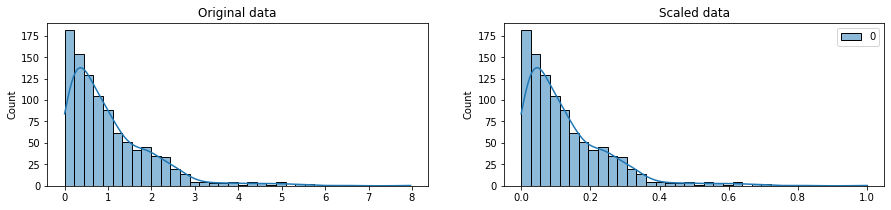

In [71]:
fig, ax = plt.subplots(1,2,figsize=(15,3))
sns.histplot(original_data,ax=ax[0],kde=True,legend=True)
ax[0].set_title('Original data')

sns.histplot(scaled_data,ax=ax[1],kde=True,legend=True)
ax[1].set_title('Scaled data')
plt.show()



Transformation

In [56]:
transformed_data = stats.boxcox(original_data)

In [65]:
transformed_data[0][:50]

array([ 0.40096452,  0.8246919 , -0.0856056 , -1.29655   ,  0.60106516,
       -1.75931549,  0.24281194,  0.21686761, -1.05329484, -0.55703839,
        1.86797005,  0.71139696, -1.45270913,  0.82183215,  0.99315353,
        0.48019837,  1.13707183,  0.66854657, -0.73254456, -0.44798458,
       -0.18597129, -1.7180123 , -0.26813451, -1.82993703, -1.22299126,
        0.32797224,  2.03192272,  0.02538347,  0.20148775, -1.40111949,
        1.11572089, -1.3943253 , -0.2152625 , -0.52872972,  0.688928  ,
        0.22106749, -0.15250513,  1.43988479, -0.85065063,  0.74444043,
       -1.49203272, -0.18171424,  0.77770215, -0.19701133, -0.75691032,
        0.88630495,  0.73419927, -0.77654914,  0.70935303, -0.57107124])

In [69]:
original_data[:50]

array([1.46328324, 2.10532975, 0.91703293, 0.20261437, 1.74533017,
       0.09181419, 1.26512872, 1.23460049, 0.28948199, 0.54676244,
       4.53609887, 1.91679403, 0.15801299, 2.10041096, 2.41021353,
       1.57064225, 2.69517342, 1.84880693, 0.44203576, 0.62031507,
       0.82628969, 0.09925737, 0.7570309 , 0.08004255, 0.2265285 ,
       1.36921352, 5.05019842, 1.02561944, 1.2167591 , 0.17185959,
       2.65142206, 0.17374689, 0.8010906 , 0.56520785, 1.88092107,
       1.23950555, 0.85578286, 3.37402459, 0.38035352, 1.97045323,
       0.14801928, 0.82999955, 2.02556546, 0.81672509, 0.4287532 ,
       2.21335917, 1.95370697, 0.41826132, 1.91351032, 0.53778358])

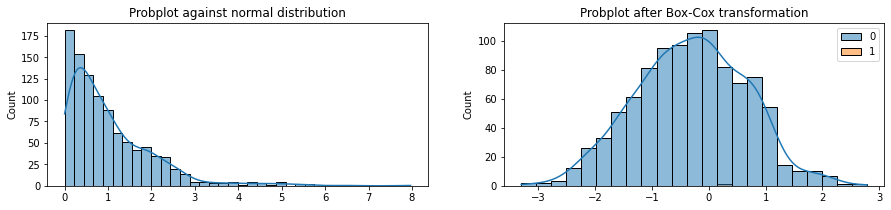

In [73]:
fig, ax = plt.subplots(1,2,figsize=(15,3))
sns.histplot(original_data,ax=ax[0],kde=True,legend=True)
ax[0].set_title('Probplot against normal distribution')

sns.histplot(transformed_data,ax=ax[1],kde=True,legend=True)
ax[1].set_title('Probplot after Box-Cox transformation')
plt.show()

Text(0.5, 1.0, 'Probplot against normal distribution')

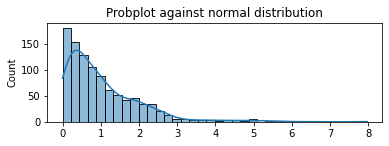

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
sns.histplot(original_data,ax=ax1,kde=True,legend=True)
ax1.set_title('Probplot against normal distribution')

### Part 3
## Parsing Dates
Help Python recognize dates as composed of day, month, and year.

In [77]:
import datetime as dt

In [88]:
catalog_df = pd.read_csv('~/Documents/Internship/Github/internship-ds/prerequisites-courses/data/catalog.csv')

In [91]:
catalog_df.head()['date']

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [95]:
catalog_df['date']= pd.to_datetime(catalog_df['date'],format="%m/%d/%y")

#### What if I run into an error with multiple date formats? 
> While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you can have pandas try to infer what the right date format should be. You can do that like so:

#### + catalog_df['date'] = pd.to_datetime(catalog_df['date'], infer_datetime_format=True)

#### Why don't you always use infer_datetime_format = True? 
> There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [98]:
catalog_df['date'][:5]

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date, dtype: datetime64[ns]

In [103]:
month_data = catalog_df['date'].dt.month

<AxesSubplot:xlabel='date', ylabel='Count'>

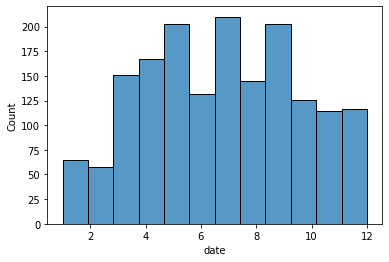

In [104]:
sns.histplot(month_data,kde=False,bins=12)

### Part 4
## Character Encodings
Avoid UnicoodeDecodeErrors when loading CSV files.

In [107]:
import chardet

In [108]:
char_data = pd.read_json('/home/bing0/Documents/Internship/Scraping/annapurna-scrape/कांग्रेस/1.json')

In [110]:
char_data.head(5)

,id,title,slug,author,province,introText,newsHighlights,status,content,featuredImage,caption,publishOn,videoLink,isFeatured,isBreakingNews,isImportantNews,categories
0,198802,कांग्रेसले चैत्रभित्रै उम्मेदवारको टुंगो लगाउँ...,kaangresle-caitrbhitrai-ummedvaarko-ttungo-lga...,अन्नपूर्ण,बागमती,फाइल तस्बिर।,None,DRAFT,"<p style=""text-align:justify""><strong>सल्यान</...",/uploads/media/Prakashsaran-mahat_202202210943...,NaN,०६ चैत २०७८,NaN,False,True,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."
1,198790,जनप्रतिनिधिले राजीनामा दिएर उम्मेदवार बन्ने प्...,jnprnidhinile-raajiinaamaa-dier-ummedvaar-bnne...,शंकरप्रसाद खनाल,,नेपाल प्रेस युनियन बाँकेले नेपालगन्जमा आयोजना ...,None,DRAFT,<p><strong>नेपालगन्ज :</strong> सत्ताधारी दल न...,/uploads/media/Congress-Spoke-Person_202203200...,NaN,०६ चैत २०७८,NaN,False,False,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."
2,198759,मार्क्स र लेलिन हुन्थे भने कांग्रेसलाई भोट हाल...,maarks-r-lelin-hunthe-bhne-kaangreslaaii-bhott...,अन्नपूर्ण,,None,None,DRAFT,<p><strong>काठमाडौं:</strong> नेपाली कांग्रेसक...,/uploads/media/BiswoPrakashSharma1_20211117112...,NaN,०५ चैत २०७८,NaN,False,False,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."
3,198758,कांग्रेसले यसपटक समयमै विधिसम्मत रुपमा उम्मेदव...,kaangresle-yspttk-smymai-vidhismmt-rupmaa-umme...,अन्नपूर्ण,,None,None,DRAFT,<p><strong>काठमाडौं : </strong>नेपाली कांग्रेस...,/uploads/media/prakashman-sing_20220319123815.jpg,NaN,०५ चैत २०७८,NaN,False,False,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."
4,198753,"माओवादी, एमाले र कांग्रेस अलग पार्टी होइनन् : ...",maaovaadii-emaale-r-kaangres-alg-paarttii-hoin...,अन्नपूर्ण,,None,None,DRAFT,<p><strong>सिन्धुली:</strong> राष्ट्रिय प्रजात...,/uploads/media/RajendraLingden1_20220227110933...,NaN,०५ चैत २०७८,NaN,False,False,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."


In [112]:
with open('/home/bing0/Documents/Internship/Scraping/annapurna-scrape/कांग्रेस/1.json','rb') as file:
    result = chardet.detect(file.read())

In [113]:
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [114]:
char_data = pd.read_json('/home/bing0/Documents/Internship/Scraping/annapurna-scrape/कांग्रेस/1.json',encoding='utf-8')

In [116]:
char_data.head()

,id,title,slug,author,province,introText,newsHighlights,status,content,featuredImage,caption,publishOn,videoLink,isFeatured,isBreakingNews,isImportantNews,categories
0,198802,कांग्रेसले चैत्रभित्रै उम्मेदवारको टुंगो लगाउँ...,kaangresle-caitrbhitrai-ummedvaarko-ttungo-lga...,अन्नपूर्ण,बागमती,फाइल तस्बिर।,None,DRAFT,"<p style=""text-align:justify""><strong>सल्यान</...",/uploads/media/Prakashsaran-mahat_202202210943...,NaN,०६ चैत २०७८,NaN,False,True,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."
1,198790,जनप्रतिनिधिले राजीनामा दिएर उम्मेदवार बन्ने प्...,jnprnidhinile-raajiinaamaa-dier-ummedvaar-bnne...,शंकरप्रसाद खनाल,,नेपाल प्रेस युनियन बाँकेले नेपालगन्जमा आयोजना ...,None,DRAFT,<p><strong>नेपालगन्ज :</strong> सत्ताधारी दल न...,/uploads/media/Congress-Spoke-Person_202203200...,NaN,०६ चैत २०७८,NaN,False,False,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."
2,198759,मार्क्स र लेलिन हुन्थे भने कांग्रेसलाई भोट हाल...,maarks-r-lelin-hunthe-bhne-kaangreslaaii-bhott...,अन्नपूर्ण,,None,None,DRAFT,<p><strong>काठमाडौं:</strong> नेपाली कांग्रेसक...,/uploads/media/BiswoPrakashSharma1_20211117112...,NaN,०५ चैत २०७८,NaN,False,False,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."
3,198758,कांग्रेसले यसपटक समयमै विधिसम्मत रुपमा उम्मेदव...,kaangresle-yspttk-smymai-vidhismmt-rupmaa-umme...,अन्नपूर्ण,,None,None,DRAFT,<p><strong>काठमाडौं : </strong>नेपाली कांग्रेस...,/uploads/media/prakashman-sing_20220319123815.jpg,NaN,०५ चैत २०७८,NaN,False,False,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."
4,198753,"माओवादी, एमाले र कांग्रेस अलग पार्टी होइनन् : ...",maaovaadii-emaale-r-kaangres-alg-paarttii-hoin...,अन्नपूर्ण,,None,None,DRAFT,<p><strong>सिन्धुली:</strong> राष्ट्रिय प्रजात...,/uploads/media/RajendraLingden1_20220227110933...,NaN,०५ चैत २०७८,NaN,False,False,False,"[{'id': 32, 'name': 'राजनीति', 'alias': 'polit..."


In [122]:
text = 'helloउ'
byte = text.encode('utf-8')

In [123]:
byte

b'hello\xe0\xa4\x89'

In [124]:
byte.decode('utf-8')

'helloउ'

### Part 5
## Inconsistent Data Entry
Efficiently fix typos in your data.

In [163]:
incos_data = pd.read_csv('/home/bing0/Documents/Internship/Github/internship-ds/prerequisites-courses/data/pakistan_intellectual_capital.csv')

In [164]:
import fuzzywuzzy as fz
from fuzzywuzzy import process

In [165]:
incos_data.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [166]:
unique = incos_data['Department'].unique()

In [167]:
compare_result = process.extract('Computer Science & IT',unique,scorer=fz.fuzz.token_sort_ratio,limit=10)    

In [168]:
compare_result

[('Computer Science & IT', 100),
 ('Computer Science', 91),
 ('Computer Science and IT', 90),
 ('Computer Sciences', 89),
 ('Computer and Information Sciences', 73),
 ('Computer Science and Engineering', 71),
 ('Computing & Information Sciences', 69),
 ('Institute of Mathematics & Computer Science', 63),
 ('Computer Engineering', 62),
 ('Computer Science and Software Engineering', 60)]

In [169]:
replaced_data = [compare_result[0] for compare_result in compare_result if compare_result[1]>=73]

In [170]:
[x[0] for x in compare_result if x[1]>=73]

['Computer Science & IT',
 'Computer Science',
 'Computer Science and IT',
 'Computer Sciences',
 'Computer and Information Sciences']

In [171]:
matched = incos_data['Department'].isin(replaced_data)

In [172]:
incos_data.loc[matched,'Department'] = 'Computer Science & Information Technology'

In [174]:
incos_data['Department'].unique()

array(['Computer Science & Information Technology', 'Computing',
       'Computer Science and Software Engineering',
       'Software Engineering', 'Information Technology', 'CS & IT',
       'School of Information and Technology',
       'Institute of Mathematics & Computer Science',
       'ENGINEERING, SCIENCE & TECHNOLOGY', 'Computer Engineering',
       'Computing & Information Sciences',
       'FACULTY OF COMPUTING & ENGINEERING',
       'Computer Science and Engineering'], dtype=object)

### Part 3